# Life Expectancy Datasets

In [114]:
# Dependencies and setup

import pandas as pd
import requests
import matplotlib.pyplot as plt

### Life Expectancy Dataset loaded and cleaned
#### Life_Exp_df

In [115]:
Life_Exp_Male_df = pd.read_csv('Resources/WHO Life Expectancy Male.csv')
Life_Exp_Female_df = pd.read_csv('Resources/WHO Life Expectancy Female.csv')

# Rows with little or no data were removed from CSV file, easier to do in Excel. 

# Columns need to be converted to row data
Life_Exp_Male_df = pd.melt(Life_Exp_Male_df, id_vars = 'Country', var_name = 'Year', value_name = 'Life Expectancy Male')
Life_Exp_Female_df = pd.melt(Life_Exp_Female_df, id_vars = 'Country', var_name = 'Year', value_name = 'Life Expectancy Female')

# Merge Male / Female Data 
Life_Exp_df = pd.merge(Life_Exp_Male_df, Life_Exp_Female_df, on = ['Country', 'Year'], how='inner')

# Convert Year to integer
Life_Exp_df['Year'] = Life_Exp_df['Year'].astype(int)

# Reduce decimal places to 1
Life_Exp_df['Life Expectancy Male'] = Life_Exp_df['Life Expectancy Male'].round(1)
Life_Exp_df['Life Expectancy Female'] = Life_Exp_df['Life Expectancy Female'].round(1)

Life_Exp_df.head()

,Country,Year,Life Expectancy Male,Life Expectancy Female
0,Aruba,1960,61,68
1,Africa Eastern and Southern,1960,42,46
2,Afghanistan,1960,32,33
3,Africa Western and Central,1960,36,39
4,Angola,1960,37,40


In [116]:
Life_Exp_df['Country'].nunique()

209

### Population Dataset loaded and cleaned
#### Population_df
#### All_Data_df

In [117]:
Population_df = pd.read_csv('Resources/WHO Population.csv')

# Columns need to be converted to row data
Population_df = pd.melt(Population_df, id_vars = 'Country', var_name = 'Year', value_name = 'Population')

# Convert Year to integer
Population_df['Year'] = Population_df['Year'].astype(int)

# Convert Population cloumn to integer
Population_df['Population'] = Population_df['Population'].astype(int)

# Merge Population with Main dataset
All_Data_df = pd.merge(Life_Exp_df, Population_df,on = ['Country', 'Year'])

All_Data_df.head()

,Country,Year,Life Expectancy Male,Life Expectancy Female,Population
0,Aruba,1960,61,68,54608
1,Africa Eastern and Southern,1960,42,46,130692579
2,Afghanistan,1960,32,33,8622466
3,Africa Western and Central,1960,36,39,97256290
4,Angola,1960,37,40,5357195


### Territory (in Sq Kilometers) loaded and cleaned
#### Territory_df
#### All_Data_df

In [118]:
Territory_df = pd.read_csv('Resources/WB Square km.csv')

Territory_df['Square km'] = Territory_df['Square km'].astype(int)

All_Data_df = pd.merge(All_Data_df, Territory_df, on=['Country'], how='left')

All_Data_df.head()

,Country,Year,Life Expectancy Male,Life Expectancy Female,Population,Square km
0,Aruba,1960,61,68,54608,180
1,Africa Eastern and Southern,1960,42,46,130692579,"14,845,123"
2,Afghanistan,1960,32,33,8622466,"652,230"
3,Africa Western and Central,1960,36,39,97256290,"9,045,773"
4,Angola,1960,37,40,5357195,"1,246,700"


### GDP Dataset loaded and cleaned
#### GDP_df
#### All_Data_df

In [119]:
GDP_df = pd.read_csv('Resources/WHO GDP.csv')

# Columns need to be converted to row data
GDP_df = pd.melt(GDP_df, id_vars = 'Country', var_name = 'Year', value_name = 'GDP')

GDP_df['Year'] = GDP_df['Year'].astype(int)
GDP_df['GDP'] = GDP_df['GDP'].astype(float) 

pd.set_option('display.float_format', '{:,.0f}'.format)

GDP_df.head()

,Country,Year,GDP
0,Aruba,1960,NaN
1,Africa Eastern and Southern,1960,"21,125,015,452"
2,Africa Western and Central,1960,"10,447,637,853"
3,Angola,1960,NaN
4,Albania,1960,NaN


In [120]:
All_Data_df = pd.merge(All_Data_df, GDP_df, on=['Country', 'Year'], how='left')

All_Data_df.head()

,Country,Year,Life Expectancy Male,Life Expectancy Female,Population,Square km,GDP
0,Aruba,1960,61,68,54608,180,NaN
1,Africa Eastern and Southern,1960,42,46,130692579,"14,845,123","21,125,015,452"
2,Afghanistan,1960,32,33,8622466,"652,230",NaN
3,Africa Western and Central,1960,36,39,97256290,"9,045,773","10,447,637,853"
4,Angola,1960,37,40,5357195,"1,246,700",NaN


### OECD GDP Growth Dataset loaded and cleaned
#### GDP_Growth_df
#### All_Data_df

In [121]:
# Load data into dataframe
GDP_Growth_df = pd.read_csv('Resources/OECD GDP Growth Data.csv') 

# Reshape the GDP_Growth_df so that years are listed in rows instead of columns
GDP_Growth_df = pd.melt(GDP_Growth_df, id_vars = 'Country', var_name = 'Year', value_name = 'GDP Growth %')

GDP_Growth_df.replace('no data', pd.NA, inplace=True)
GDP_Growth_df['GDP Growth %'] = pd.to_numeric(GDP_Growth_df['GDP Growth %'], errors='coerce')

GDP_Growth_df['Year'] = GDP_Growth_df['Year'].astype(int)
GDP_Growth_df['GDP Growth %'] = GDP_Growth_df['GDP Growth %'].astype(float)

GDP_Growth_df.head()

,Country,Year,GDP Growth %
0,Afghanistan,1980,NaN
1,Albania,1980,3
2,Algeria,1980,-5
3,Andorra,1980,NaN
4,Angola,1980,2


In [122]:
All_Data_df = pd.merge(All_Data_df, GDP_Growth_df, on = ['Country', 'Year'], how='left')

All_Data_df.head()

,Country,Year,Life Expectancy Male,Life Expectancy Female,Population,Square km,GDP,GDP Growth %
0,Aruba,1960,61,68,54608,180,NaN,NaN
1,Africa Eastern and Southern,1960,42,46,130692579,"14,845,123","21,125,015,452",NaN
2,Afghanistan,1960,32,33,8622466,"652,230",NaN,NaN
3,Africa Western and Central,1960,36,39,97256290,"9,045,773","10,447,637,853",NaN
4,Angola,1960,37,40,5357195,"1,246,700",NaN,NaN


### Clean Water loaded and cleaned
#### Clean_Water_df
#### All_Data_df

In [123]:
Clean_Water_df = pd.read_csv('Resources/WHO Access to Clean Water.csv')

Clean_Water_df = pd.melt(Clean_Water_df, id_vars = 'Country', var_name = 'Year', value_name = '% Population with Clean Water')

Clean_Water_df['Year'] = Clean_Water_df['Year'].astype(int)

Clean_Water_df.head()

,Country,Year,% Population with Clean Water
0,Afghanistan,2000,11
1,Africa Western and Central,2000,15
2,Albania,2000,49
3,Andorra,2000,91
4,Armenia,2000,80


In [124]:
Clean_Water_df['Country'].nunique()

145

In [125]:
All_Data_df = pd.merge(All_Data_df, Clean_Water_df, on = ['Country', 'Year'], how='left')

All_Data_df.head()

,Country,Year,Life Expectancy Male,Life Expectancy Female,Population,Square km,GDP,GDP Growth %,% Population with Clean Water
0,Aruba,1960,61,68,54608,180,NaN,NaN,NaN
1,Africa Eastern and Southern,1960,42,46,130692579,"14,845,123","21,125,015,452",NaN,NaN
2,Afghanistan,1960,32,33,8622466,"652,230",NaN,NaN,NaN
3,Africa Western and Central,1960,36,39,97256290,"9,045,773","10,447,637,853",NaN,NaN
4,Angola,1960,37,40,5357195,"1,246,700",NaN,NaN,NaN


### Sanitation loaded and cleaned
#### Sanitation_df
#### All_Data_df

In [126]:
Sanitation_df = pd.read_csv('Resources/WHO Access to Sanitation.csv')

Sanitation_df = pd.melt(Sanitation_df, id_vars = 'Country', var_name = 'Year', value_name = '% Population with Sanitation')

Sanitation_df['Year'] = Sanitation_df['Year'].astype(int)

Sanitation_df.head()

,Country,Year,% Population with Sanitation
0,Africa Western and Central,2000,16
1,Albania,2000,40
2,Andorra,2000,15
3,Arab World,2000,39
4,United Arab Emirates,2000,NaN


In [127]:
All_Data_df = pd.merge(All_Data_df, Sanitation_df, on=['Country', 'Year'], how='left')

All_Data_df.head()

,Country,Year,Life Expectancy Male,Life Expectancy Female,Population,Square km,GDP,GDP Growth %,% Population with Clean Water,% Population with Sanitation
0,Aruba,1960,61,68,54608,180,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,1960,42,46,130692579,"14,845,123","21,125,015,452",NaN,NaN,NaN
2,Afghanistan,1960,32,33,8622466,"652,230",NaN,NaN,NaN,NaN
3,Africa Western and Central,1960,36,39,97256290,"9,045,773","10,447,637,853",NaN,NaN,NaN
4,Angola,1960,37,40,5357195,"1,246,700",NaN,NaN,NaN,NaN


### GBD Study Cancer loaded

In [128]:
GBD_Cancer_df = pd.read_csv('Resources/GBD Study Cancer.csv')

GBD_Cancer_df.head()

,measure_name,location_id,Country,sex_id,sex_name,age_group_id,age_group_name,cause_id,cause_name,rei_id,...,year_id,year_start_id,year_end_id,metric_id,metric_name,metric_numerator_name,metric_denominator_name,val,upper,lower
0,DALYs (Disability-Adjusted Life Years),1,Global,3,Both,27,Age-standardized,1029,Total cancers,169,...,"2,019",NaN,NaN,NaN,Relative uncertainty in the percent of risk-at...,Difference between 97.5% percentile and 2.5% p...,Total cancer age-standardized rate mean,0,NaN,NaN
1,DALYs (Disability-Adjusted Life Years),33,Armenia,3,Both,27,Age-standardized,1029,Total cancers,169,...,"2,019",NaN,NaN,NaN,Relative uncertainty in the percent of risk-at...,Difference between 97.5% percentile and 2.5% p...,Total cancer age-standardized rate mean,0,NaN,NaN
2,DALYs (Disability-Adjusted Life Years),34,Azerbaijan,3,Both,27,Age-standardized,1029,Total cancers,169,...,"2,019",NaN,NaN,NaN,Relative uncertainty in the percent of risk-at...,Difference between 97.5% percentile and 2.5% p...,Total cancer age-standardized rate mean,0,NaN,NaN
3,DALYs (Disability-Adjusted Life Years),35,Georgia,3,Both,27,Age-standardized,1029,Total cancers,169,...,"2,019",NaN,NaN,NaN,Relative uncertainty in the percent of risk-at...,Difference between 97.5% percentile and 2.5% p...,Total cancer age-standardized rate mean,0,NaN,NaN
4,DALYs (Disability-Adjusted Life Years),36,Kazakhstan,3,Both,27,Age-standardized,1029,Total cancers,169,...,"2,019",NaN,NaN,NaN,Relative uncertainty in the percent of risk-at...,Difference between 97.5% percentile and 2.5% p...,Total cancer age-standardized rate mean,0,NaN,NaN


# Life Expectancy Visualizations

### Line Chart showing life expectancy over time

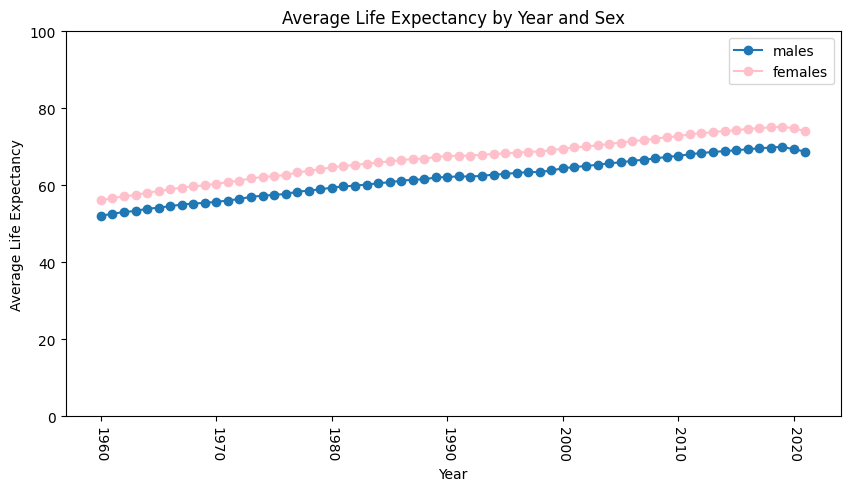

In [129]:
# non-numeric values need to be coerced
Life_Exp_df['Life Expectancy Male'] = pd.to_numeric(Life_Exp_df['Life Expectancy Male'], errors='coerce')
Life_Exp_df['Life Expectancy Female'] = pd.to_numeric(Life_Exp_df['Life Expectancy Female'], errors='coerce')

m_df = Life_Exp_df[Life_Exp_df['Year'] != '2022']
f_df = Life_Exp_df[Life_Exp_df['Year'] != '2022']

# Grouping by 'Year' and 'Status' and calculating average life expectancy
m_grouped_df = m_df.groupby(['Year'])['Life Expectancy Male'].mean().reset_index()
f_grouped_df = f_df.groupby(['Year'])['Life Expectancy Female'].mean().reset_index()

# Creating the line chart
plt.figure(figsize =(10, 5))  

# Line plot for Males
plt.plot(m_grouped_df['Year'], m_grouped_df['Life Expectancy Male'], label='males', marker='o')

# Line plot for Females
plt.plot(f_grouped_df['Year'], f_grouped_df['Life Expectancy Female'], label='females', marker='o', color='pink')

plt.xlabel('Year')
plt.ylabel('Average Life Expectancy')
plt.title('Average Life Expectancy by Year and Sex')
plt.ylim(0, 100)
plt.legend()
plt.xticks(rotation=-90) 

plt.show()

### Scatter Plot showing Life Expectancy vs. Population

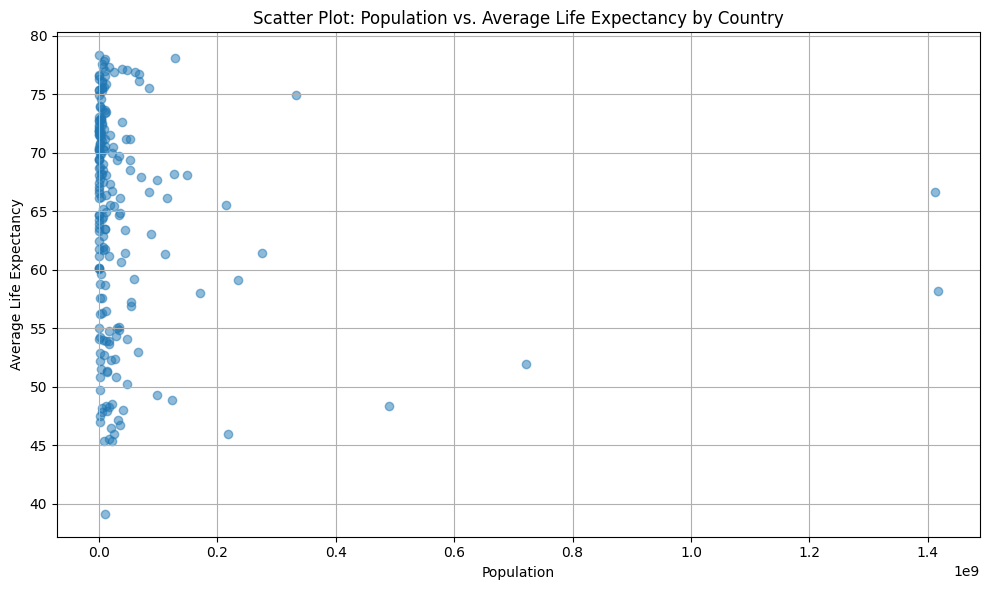

In [130]:
# Convert 'Life Expectancy Male' and 'Life Expectancy Female' columns to numeric, replacing empty strings with NaN
All_Data_df['Life Expectancy Male'] = pd.to_numeric(All_Data_df['Life Expectancy Male'], errors='coerce')
All_Data_df['Life Expectancy Female'] = pd.to_numeric(All_Data_df['Life Expectancy Female'], errors='coerce')

# Calculate the average life expectancy by averaging 'Life Expectancy Male' and 'Life Expectancy Female' columns
All_Data_df['Average Life Expectancy'] = (All_Data_df['Life Expectancy Male'] + All_Data_df['Life Expectancy Female']) / 2

All_Data_df['Population Density'] = (All_Data_df['Square km'] / All_Data_df['Population'])

# Group by 'Country' 
grouped_df = All_Data_df.groupby('Country').agg({
    'Average Life Expectancy': 'mean',
 
    'Population': 'max'
}).reset_index()

# Remove rows with NaN values (if any) after calculating the average
grouped_df = grouped_df.dropna()

# Reverse the x and y-axis data
x = grouped_df['Population']
y = grouped_df['Average Life Expectancy']

plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.5)

plt.xlabel('Population')
plt.ylabel('Average Life Expectancy')
plt.title('Scatter Plot: Population vs. Average Life Expectancy by Country')

plt.grid(True)
plt.tight_layout()

plt.show()




In [131]:
All_Data_df.dtypes

Country                           object
Year                               int64
Life Expectancy Male             float64
Life Expectancy Female           float64
Population                         int64
Square km                        float64
GDP                              float64
GDP Growth %                     float64
% Population with Clean Water    float64
% Population with Sanitation     float64
Average Life Expectancy          float64
Population Density               float64
dtype: object

IndexError: index 0 is out of bounds for axis 0 with size 0

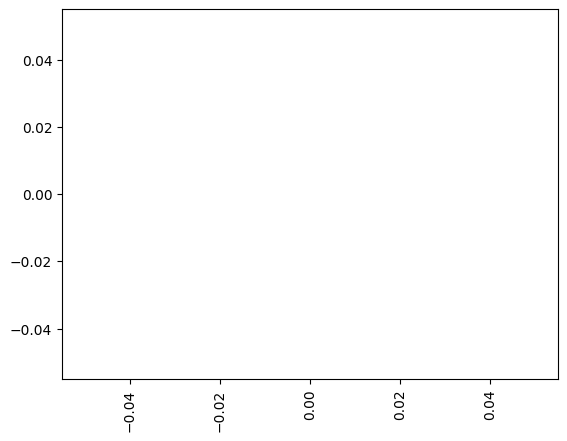

In [132]:
# Creating a bar plot using pandas and matplotlib

recent_data_df = All_Data_df[All_Data_df['Year'] == '2021']
recent_data_df = recent_data_df[recent_data_df['Population'] > 400000000]

recent_data_df.plot(x='Country', y='Population', kind='bar', legend=False)



# Setting labels and title
plt.xlabel('Country')
plt.ylabel('Population')
plt.title('Population of Countries')

plt.xticks(rotation=90) 

# Display the plot
plt.show()


In [ ]:
Outliers_df = grouped_df[Life_Exp_df['Population'] > 40000000]
Outliers_df

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Assuming you have a DataFrame named 'Life_Exp_Report_df' with columns 'Country', 'BMI', and 'Life Expectancy'

# Calculate average BMI and Life Expectancy grouped by 'Country'
avg_data = Life_Exp_Report_df.groupby('Country').mean([['BMI', 'Life Expectancy']])

x_avg = avg_data['BMI']
y_avg = avg_data['Life Expectancy']

plt.figure(figsize=(10, 6))  
plt.scatter(x_avg, y_avg, alpha=0.5)  

plt.xlabel('BMI')
plt.ylabel('Life Expectancy')
plt.title('Scatter Plot: Average BMI vs. Average Life Expectancy by Country')

# Calculate the linear regression
slope, intercept, r_value, p_value, std_err = linregress(x_avg, y_avg)

# Create the linear regression line using the calculated slope and intercept
regression_line = slope * x_avg + intercept

# Plot the linear regression line
plt.plot(x_avg, regression_line, color='red', linewidth=2)

plt.grid(True)
plt.tight_layout()

# Format y-axis labels to display population in millions (if needed)
# plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

plt.show()

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
# Load the built-in world dataset from geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
# Generate sample data for visualization
data = {
    'country': ['United States', 'Canada', 'Mexico'],
    'gdp_value': ['United States', 'Canada', 'Mexico']
}
gdp_df = pd.DataFrame(data)
# Merge GeoDataFrame with DataFrame based on country names
merged_gdf = world.merge(gdp_df, left_on='name', right_on='country', how='left')
# Set up the figure and axis
fig, ax = plt.subplots(1, figsize=(12, 8))
# Plot the choropleth map
merged_gdf.plot(column='gdp_value', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
# Customize the plot (optional)
ax.set_title('World GDP Choropleth Map')
ax.axis('off')
# Show the plot
plt.show()


In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
# Load the built-in world dataset from geopandas
world = gpd.read_file(gpd.datasets.get_path(' '))
# Generate sample data for visualization
data = {
    'country': ['United States', 'Canada', 'Mexico'],
    'gdp_value': ['United States', 'Canada', 'Mexico']
}
gdp_df = pd.DataFrame(data)
# Merge GeoDataFrame with DataFrame based on country names
merged_gdf = world.merge(gdp_df, left_on='name', right_on='country', how='left')
# Set up the figure and axis
fig, ax = plt.subplots(1, figsize=(12, 8))
# Plot the choropleth map
merged_gdf.plot(column='gdp_value', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
# Customize the plot (optional)
ax.set_title('World GDP Choropleth Map')
ax.axis('off')
# Show the plot
plt.show()

In [ ]:
# Replace the codes in the 'state' column with the corresponding state names
data['state'] = data['state'].map(state_codes)

# Save the updated dataset to a new CSV file or update the original file if needed
data.to_csv('Updated_BMI_Life_data(State).csv', index=False)